**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# import data 2C_weka.csv for 2 Class Classifcation.


In [74]:
data_2C = pd.read_csv('2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

### Answer

### Checking for how the data is read and what is in the data
- First the first 5 data points are checked using the head command
- Second the bottom 5 data points are checked using the tail command
- Third 5 random data points from the dataframe is checked using the sample command

In [75]:
data_2C.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [76]:
data_2C.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [77]:
data_2C.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
178,80.654320,26.344379,60.898118,54.309940,120.103493,52.467552,Abnormal
254,72.955644,19.576971,61.007071,53.378673,111.234047,0.813491,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,Abnormal
144,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133,Abnormal


#### Insights from looking at the head, tail and sample data
- There is one categorical variable - 'class'
- Categorical variable 'class' takes 2 values - Normal and Abnormal
- Remaining features are all numerical

### Checking dataframe for missing values

In [78]:
data_2C.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

#### Insights from testing for missing values
It is seen that there are no missing values in the Dataframe that has been read. Hence no corrective action needs to be taken.

### Checking for 5 point summary of the numerical data to get an idea of nature of the data (numerical and graphical analysis)

In [79]:
data_2C.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


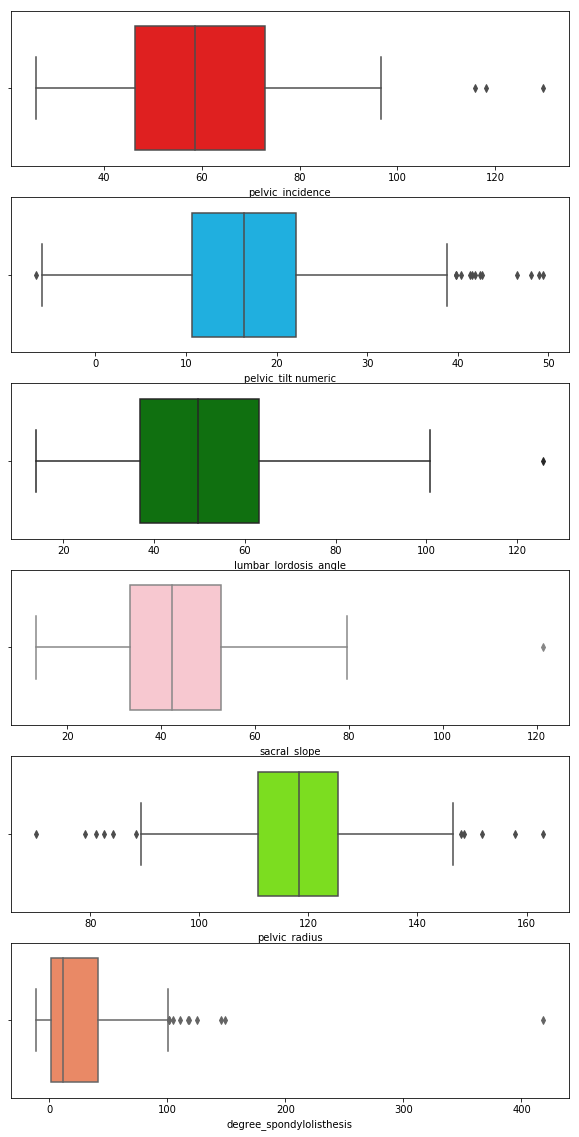

In [80]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize = (10,20))
sns.boxplot(data_2C['pelvic_incidence'], color ='r', ax = axes[0]);
sns.boxplot(data_2C['pelvic_tilt numeric'], color = 'deepskyblue', ax = axes[1]);
sns.boxplot(data_2C['lumbar_lordosis_angle'], color = 'g', ax = axes[2]);
sns.boxplot(data_2C['sacral_slope'], color = 'pink', ax = axes[3]);
sns.boxplot(data_2C['pelvic_radius'], color = 'lawngreen', ax = axes[4]);
sns.boxplot(data_2C['degree_spondylolisthesis'], color = 'coral', ax = axes[5]);

#### Insights from 5 point summary
- There are 310 data points for each of the numerical features 
- 'pelvic_incidence': 
    - Mean and median are very close to each other. Mean slightly more than median, suggesting there might be high outliers. 
    - The max value of 129.8 confirms high outliers (value greater than median + 1.5xIQR)
    - Box plot confirms presence of outliers although very small in number
- 'pelvic_tilt numeric':
    - Can take both positive as well as negatove values
    - This also seems to have high outliers
- 'lumbar_lordosis_angle':
    - Mean and median are very close to each other. Mean slightly more than median, suggesting there might be high outliers. 
    - The max value of 125.7 confirms high outliers (value greater than median + 1.5xIQR)
    - Box plot confirms presence of outliers although very small in number
- 'sacral_slope':
    - Mean and median almost same
    - The max value of 121.4 confirms high outliers (value greater than median + 1.5xIQR)
    - Box plot confirms presence of outliers although very small in number
- 'pelvic_radius':
    - Mean and median almost same
    - The max value of 163.07 confirms high outliers (value greater than median + 1.5xIQR)
    - Box plot shows both low and high ourliers
- 'degree_spondylolisthesis':
    - Can take both positive as well as negatove values
    - This also seems to have high outliers
    - Mean a lot greater than median indicating high outliers in the data
    - Box plot confirms presence of outliers although very small in number

### Checking data types of the features

In [81]:
data_2C.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

#### Insights about data types
- It is seen that all the data types are float EXCEPT class which is a categorical type of variable

### Checking for the different unique values of categorical variable 'class'

In [82]:
data_2C['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

#### Insights from unoque values
- It is seen that there are two categories of data - Abnormal and Normal 

### Checking for the shape of the data set 


In [83]:
data_2C.shape

(310, 7)

#### Insghts from shape
- There are 310 rows and 7 columns (features) in the data set 

### Distribution of values of class and attributes

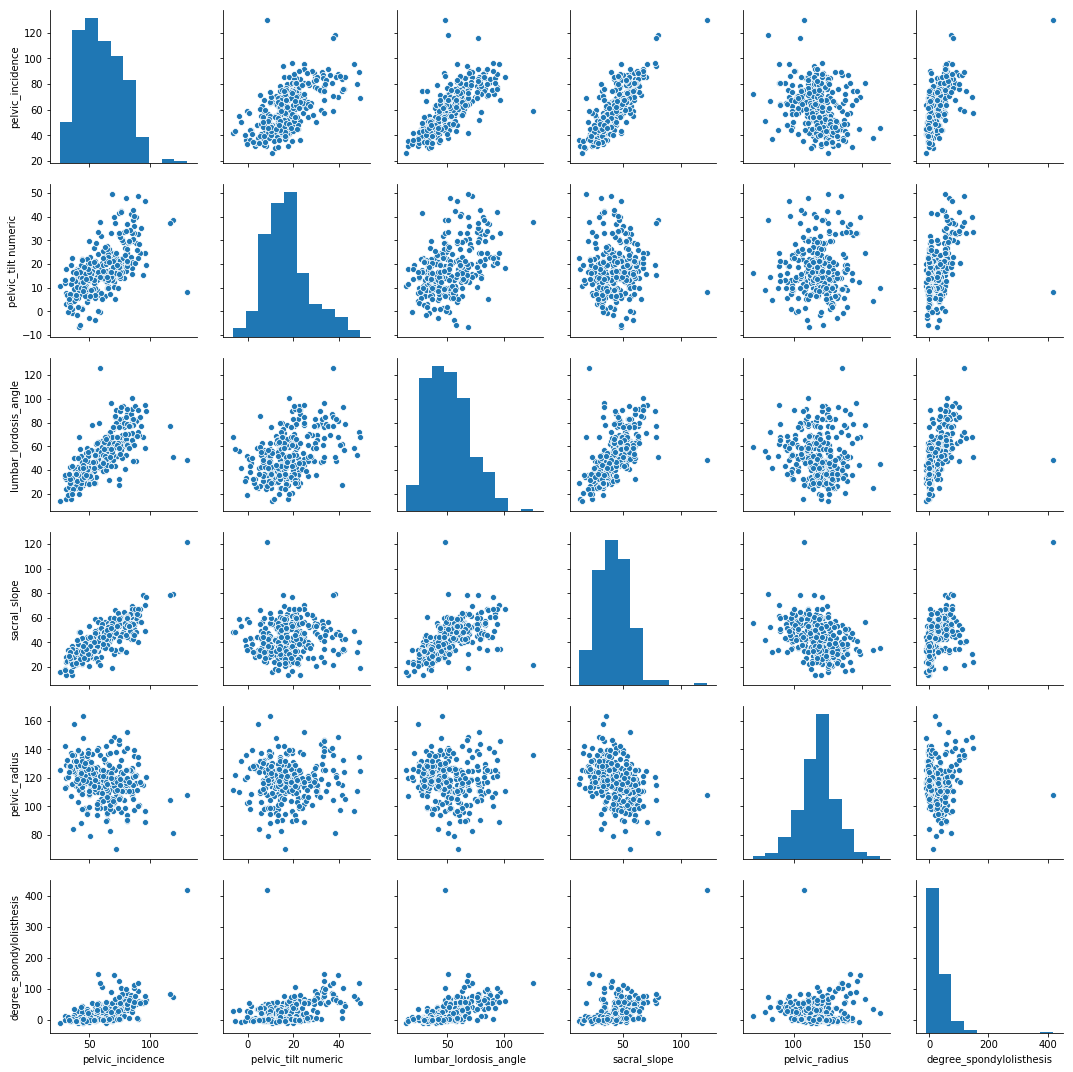

In [84]:
sns.pairplot(data_2C);

#### Insights from the pair plot about the attributes
- pelvic Incidence seems to be positively correlated with pelvic_tilt_numeric, lumbar_lordosis_angle and sacral slope
- No strong correlation is seen between pelvic_radius and pelivic incidence
- degree_spondylolisthesis seem to correlate well with any of the ther features
- As a distribution degree_spondylolisthesis is heavily positively skewed
- pelvic_tilt_numeric does not seem to have correlation with pelvic_radius and sacral slope
- pelvic_tilt_numeric seems to have slight positive correlation with lumbar_lordosis_angle
- sacral_slope and lumbar_lordosis_angle seem to be positively correlated
- pelvic_radius seems to have no visible correlation with most of the other features
- pelvic_radius has a very symmetric distribution 
- sacral slope has a some high outliers. If these outliers are removed then it is symmetric and near normal distribution. 
- lumbar_lordosis_angle has a some high outliers. If these outliers are removed then it is fairly symmetric.
- pelvic_tilt_numeric is slightly positively skewed with high outliers
- pelvic_incidence has a some high outliers.

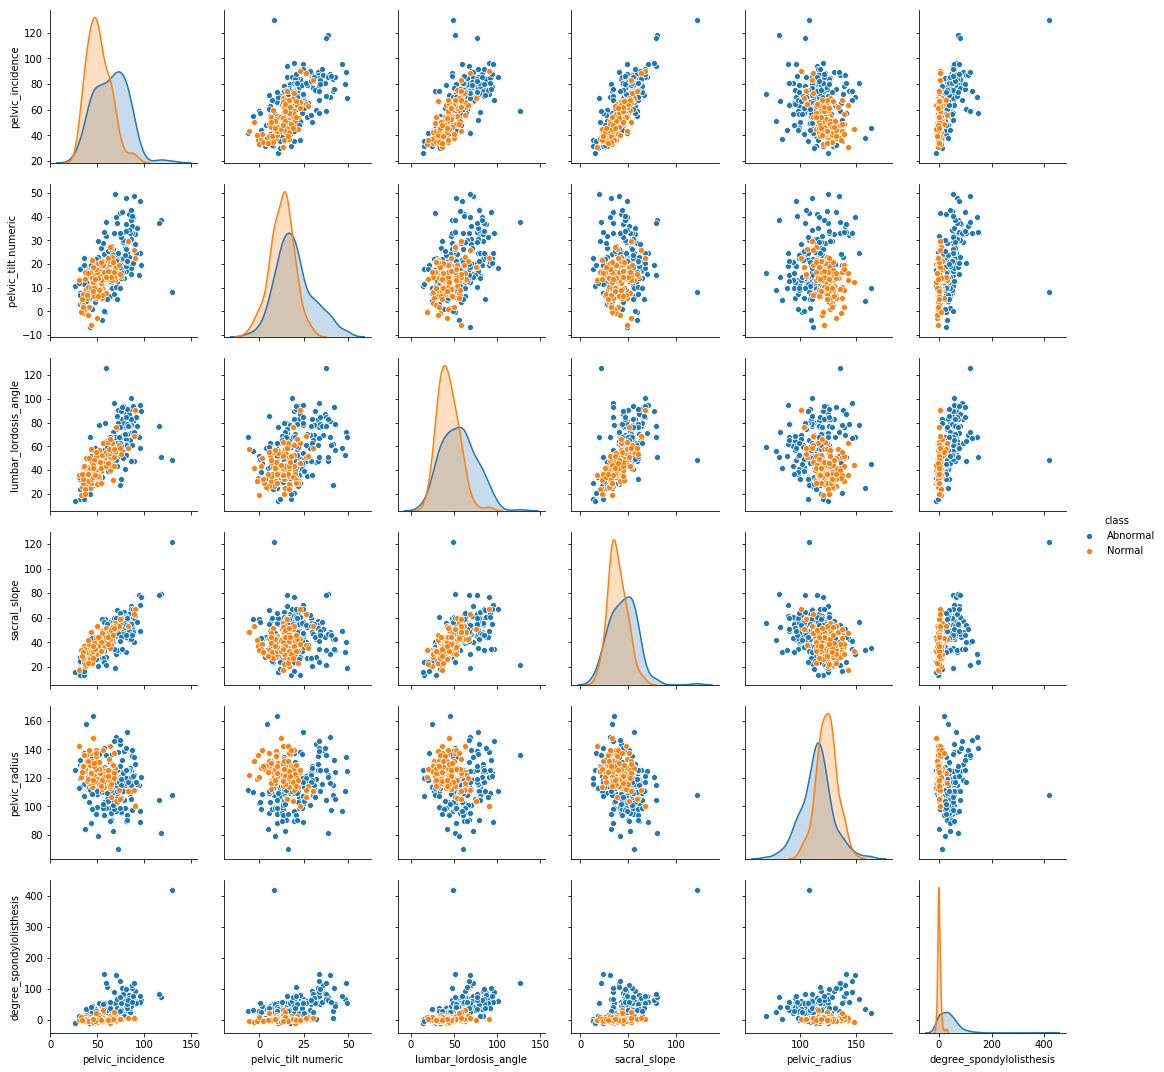

In [85]:
sns.pairplot(data_2C, hue = 'class');

#### Insights from the pair plot with hues
- The distributions do not separate out nicely when the hue based on class is applied
- This goes to show that without processing this data set may not give good KNN scores 
- This is also reflected in other scatter plots as well
- degree_spindylolisthesis seems to have a very narrow peakiy distribution for Normal data set. Abnormal is more spread out. Values of Normal dataset also seemt to be lower than Abnormal data set. 

### Plotting the distribution of different classes for pelvic_radius and sacral_slope for visualization.

[Text(0.5, 0, 'Pelvic radis and Sacral slope')]

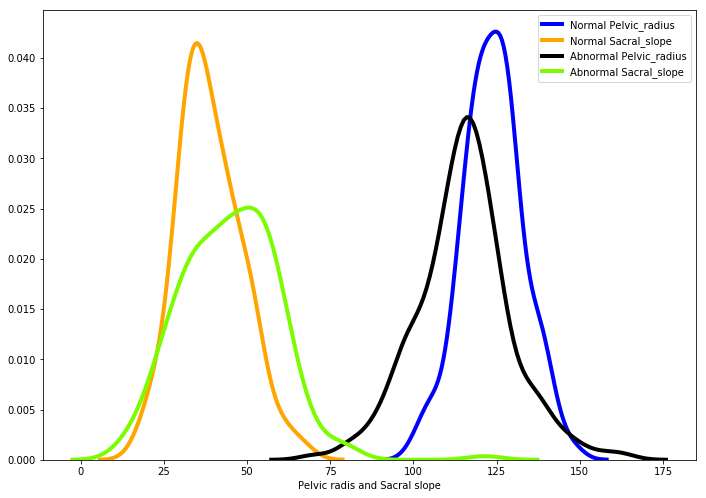

In [86]:
normal_data = data_2C.loc[data_2C['class'] == 'Normal']
abnormal_data = data_2C.loc[data_2C['class']== 'Abnormal']
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(normal_data.pelvic_radius, hist = False,kde_kws={"color":"blue", "lw": 4, "label": "Normal Pelvic_radius"});
sns.distplot(normal_data.sacral_slope, hist = False, kde_kws={"color":"orange", "lw": 4, "label": "Normal Sacral_slope"});
sns.distplot(abnormal_data.pelvic_radius, hist = False, kde_kws={"color":"k", "lw": 4, "label": "Abnormal Pelvic_radius"});
sns.distplot(abnormal_data.sacral_slope, hist = False, kde_kws={"color":"lawngreen", "lw": 4, "label": "Abnormal Sacral_slope"});
ax.set(xlabel = 'Pelvic radis and Sacral slope')

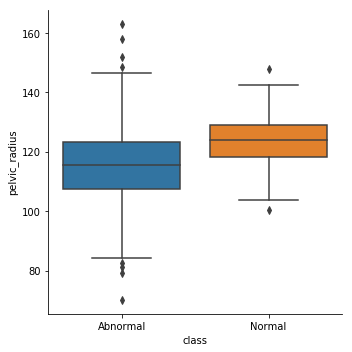

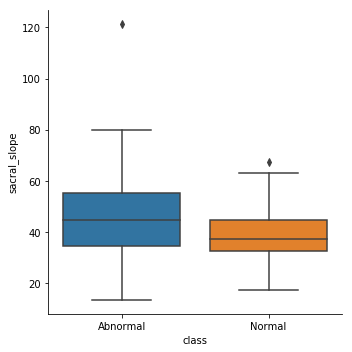

In [87]:
sns.catplot(x = 'class', y = 'pelvic_radius',  data=data_2C, kind = 'box');
sns.catplot(x = 'class', y = 'sacral_slope',  data=data_2C, kind = 'box');

#### Insights from the above distribution and box plots
- Pelvic radius and sacral slope them selves have different values and the distributions are separate
- Classes of Normal and Abnormal visually do not seem to effect pelvic radius and sacral slope 
- Abnormal frequency is lower than normal frequency

# Encode the Class variable to integer.

In [88]:
label_encoder = preprocessing.LabelEncoder() 
data_2C['class']= label_encoder.fit_transform(data_2C['class']) 

#### Verification that encoding has taken place

In [89]:
data_2C.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


#### Checking the codes that have been assigned to the categories

In [90]:
d = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print (d)

{'Abnormal': 0, 'Normal': 1}


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [91]:
X = data_2C.drop('class', axis = 1)

In [92]:
y = data_2C['class']

In [93]:
X.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [94]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Split the dat as train and test with a ratio of 70:30.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Verifying that the split has taken place correctly

In [96]:
X_train.shape

(217, 6)

In [97]:
X_test.shape

(93, 6)

- This shows that the data set has been spilt into test and train data sets in the ratio of 70:30 

### NOTE: 
- It is to be noted that here only 1 random value is tested for developing the model. 
- Under these circumstances the model perfomance may change when the random state is changed
- Ideally once should run for several random states (as used in finding optimum K later in the project), and use the average value of testing and training accuracies to judge the model
- Here, as the question merely mentions to spilt and test the model with K =3, only 1 random state value is used. 

# Normalize your Data (X) to get values between 0 to 1.

In [98]:
mm_scaler = preprocessing.MinMaxScaler()
X_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [99]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [100]:
y_predict=knn.predict(X_test_scaled)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [101]:
knn.score(X_test_scaled,y_test)

0.7204301075268817

In [102]:
accuracy_score(y_predict,y_test)

0.7204301075268817

In [103]:
y_predict_train = knn.predict(X_scaled)
accuracy_score(y_predict_train,y_train)

0.9078341013824884

### Accuracies for K = 3 and random state = 0
- Training accuracy = 0.9078
- Testing accuracy = 0.7204

#### When averged over different random states, with k =3, the average testing and training accuracies are found below:

In [104]:
train = []
test = []
for j in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
    sc=preprocessing.MinMaxScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    
#Compute accuracy on the training set
train_accuracy_plot = np.mean(train)
#Compute accuracy on the testing set
test_accuracy_plot = np.mean(test)
#Compute differences between test and training set accuracies
difference_plot= train_accuracy_plot - test_accuracy_plot

print("Average Training Accuracy over 50 random states for K = 3: ", train_accuracy_plot)
print("Average Testing Accuracy over 50 random states for K = 3: ", test_accuracy_plot)



Average Training Accuracy over 50 random states for K = 3:  0.902304147465438
Average Testing Accuracy over 50 random states for K = 3:  0.7847311827956989


### Accuracies for K = 3 and averaged over 50 random state values
- Training accuracy = 0.902
- Testing accuracy = 0.784

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

#### Algorithm used:
- A good model should not depend on the number of the random state selected for spliting the data
- Hence there are two parameters which have to be optimised - random state and k
- The value of K has to be chosen in such a way that over a variation of random states the training accuract and the difference between training and testing accuracies should be minimum
- It should not be that changing the data spliting radon state needs a change in the model 
- Hence, here, a nested loop is run over random state and K, so that we get the optimum value of K
- Criteria for choosing best K:
    - Lowest difference between training and testing accuracies 
    - Highest training accuracy

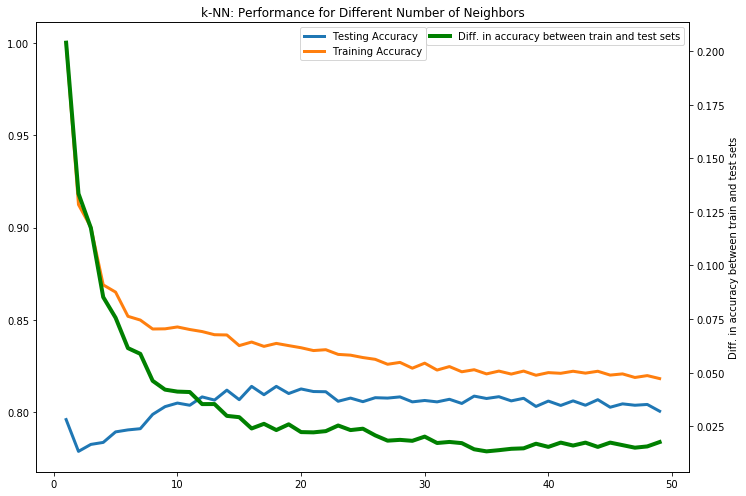

Optimum results with highest test accuracy and lowest diff between test and train accuracy 

Optimum K:  16
Training Accuracy for optimum K:  0.8380645161290323
Testing Accuracy for optimum K:  0.8140860215053763


In [105]:
neighbors = np.arange(1, 50)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
difference_plot = np.empty(len(neighbors))
diff_low = 100.0
test_high = 0.0
train_high = 0.0
nodes = 0
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=preprocessing.MinMaxScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    #Compute differences between test and training set accuracies
    difference_plot[i]= train_accuracy_plot[i] - test_accuracy_plot[i]
    if (diff_low > difference_plot[i]) & (test_high < test_accuracy_plot[i]):
        diff_low = difference_plot[i]
        test_high = test_accuracy_plot[i]
        train_high = train_accuracy_plot[i]
        nodes = i+1
        
# Generate plot
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax2 = ax.twinx()
plt.title('k-NN: Performance for Different Number of Neighbors')
ax.plot(neighbors, test_accuracy_plot, lw = 3, label = 'Testing Accuracy')
ax.plot(neighbors, train_accuracy_plot, lw = 3, label = 'Training Accuracy')
ax2.plot(neighbors, difference_plot, color = 'green', lw = 4, label = 'Diff. in accuracy between train and test sets')
ax.legend(loc = 'upper center')
ax2.legend(loc = 'upper right')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
ax2.set_ylabel('Diff. in accuracy between train and test sets')
plt.show()
print("Optimum results with highest test accuracy and lowest diff between test and train accuracy \n")
print("Optimum K: ", nodes)
print("Training Accuracy for optimum K: ", train_high)
print("Testing Accuracy for optimum K: ", test_high)


#### Manually verifying the results

In [106]:
d = {'Number of nearest neighbors (K)':neighbors,'Trainng':train_accuracy_plot, 'testing':test_accuracy_plot, 'Diff.': difference_plot}
accuracy_data = pd.DataFrame(d)
accuracy_data

,Number of nearest neighbors (K),Trainng,testing,Diff.
0,1,1.000000,0.796129,0.203871
1,2,0.912396,0.778925,0.133472
2,3,0.900184,0.782688,0.117496
3,4,0.868986,0.783763,0.085223
4,5,0.865069,0.789462,0.075607
5,6,0.851982,0.790538,0.061444
6,7,0.849954,0.791183,0.058771
7,8,0.845115,0.798925,0.046190
8,9,0.845207,0.803118,0.042089
9,10,0.846221,0.805054,0.041167


#### Result verified

## FINAL MODEL PERFORMANCE:
- Optimum results with highest test accuracy and lowest diff between test and train accuracy 

- Optimum K:  16
- Training Accuracy for optimum K:  0.839
- Testing Accuracy for optimum K:  0.814

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

### Reading the csv file as a dataframe using pandas

In [107]:
data_3C = pd.read_csv('3Classdata.csv')

### Checking for how the data is read and what is in the data
- First the first 5 data points are checked using the head command
- Second the bottom 5 data points are checked using the tail command
- Third 5 random data points from the dataframe is checked using the sample command

In [108]:
data_3C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [109]:
data_3C.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [110]:
data_3C.sample(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
55,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,Hernia
53,30.149936,11.917445,34.000000,18.232491,112.684141,11.463223,Hernia
159,64.274818,12.508643,68.702377,51.766175,95.252454,39.409826,Spondylolisthesis
177,80.817771,19.238981,61.642451,61.578791,89.471834,44.167602,Spondylolisthesis
64,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Spondylolisthesis


#### Insights from looking at the head, tail and sample data
- There is one categorical variable - 'class'
- Categorical variable 'class' takes 3 values - Normal, Abnormal and Spondylolisthesis
- Remaining features are all numerical

### Checking the data frame for missing values

In [111]:
data_3C.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

#### Insights from testing for missing values
It is seen that there are no missing values in the Dataframe that has been read. Hence no corrective action needs to be taken.

### Checking for 5 point summary of the numerical data to get an idea of nature of the data (numerical and graphical analysis)

In [112]:
data_3C.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


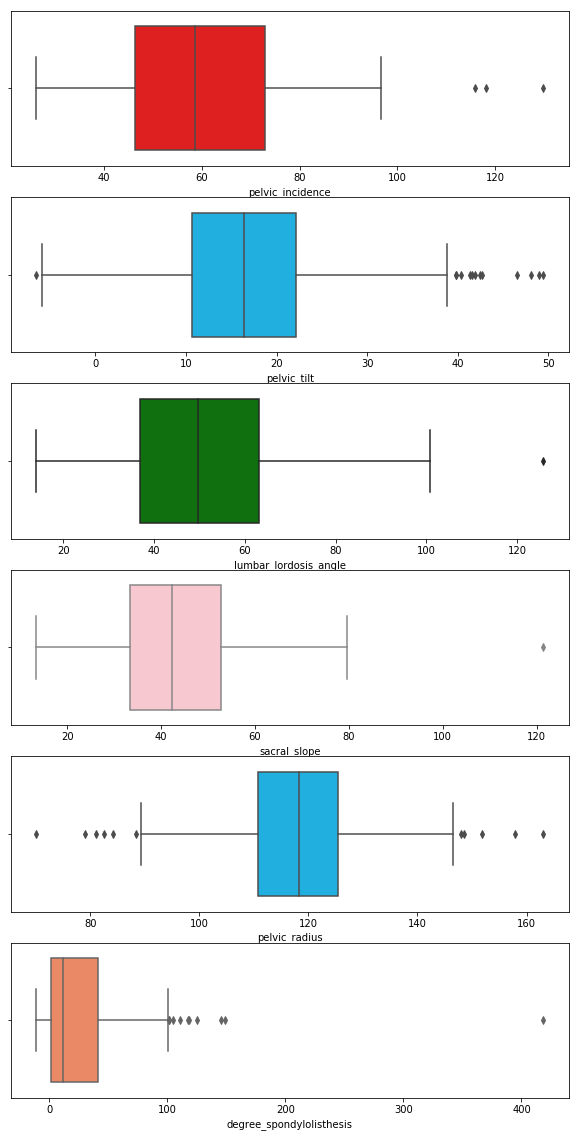

In [113]:
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize = (10,20))
sns.boxplot(data_3C['pelvic_incidence'], color ='r', ax = axes[0]);
sns.boxplot(data_3C['pelvic_tilt'], color = 'deepskyblue', ax = axes[1]);
sns.boxplot(data_3C['lumbar_lordosis_angle'], color = 'g', ax = axes[2]);
sns.boxplot(data_3C['sacral_slope'], color = 'pink', ax = axes[3]);
sns.boxplot(data_3C['pelvic_radius'], color = 'deepskyblue', ax = axes[4]);
sns.boxplot(data_3C['degree_spondylolisthesis'], color = 'coral', ax = axes[5]);

#### Insights from 5 point summary
- There are 310 data points for each of the numerical features 
- 'pelvic_incidence': 
    - Mean and median are very close to each other. Mean slightly more than median, suggesting there might be high outliers. 
    - The max value of 129.8 confirms high outliers (value greater than median + 1.5xIQR)
    - Box plot confirms presence of outliers although very small in number
- 'pelvic_tilt numeric':
    - Can take both positive as well as negatove values
    - This also seems to have high outliers
- 'lumbar_lordosis_angle':
    - Mean and median are very close to each other. Mean slightly more than median, suggesting there might be high outliers. 
    - The max value of 125.7 confirms high outliers (value greater than median + 1.5xIQR)
    - Box plot confirms presence of outliers although very small in number
- 'sacral_slope':
    - Mean and median almost same
    - The max value of 121.4 confirms high outliers (value greater than median + 1.5xIQR)
    - Box plot confirms presence of outliers although very small in number
- 'pelvic_radius':
    - Mean and median almost same
    - The max value of 163.07 confirms high outliers (value greater than median + 1.5xIQR)
    - Box plot shows both low and high ourliers
- 'degree_spondylolisthesis':
    - Can take both positive as well as negatove values
    - This also seems to have high outliers
    - Mean a lot greater than median indicating high outliers in the data
    - Box plot confirms presence of outliers although very small in number

### Checking data types of the features

In [114]:
data_3C.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

#### Insights from testing for missing values
It is seen that there are no missing values in the Dataframe that has been read. Hence no corrective action needs to be taken.

### Checking for the different unique values of categorical variable 'class'

In [115]:
data_3C['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

### Checking for the shape of the data set 



In [116]:
data_3C.shape

(310, 7)

#### Insghts from shape
- There are 310 rows and 7 columns (features) in the data set 

### Distribution of values of class and attributes

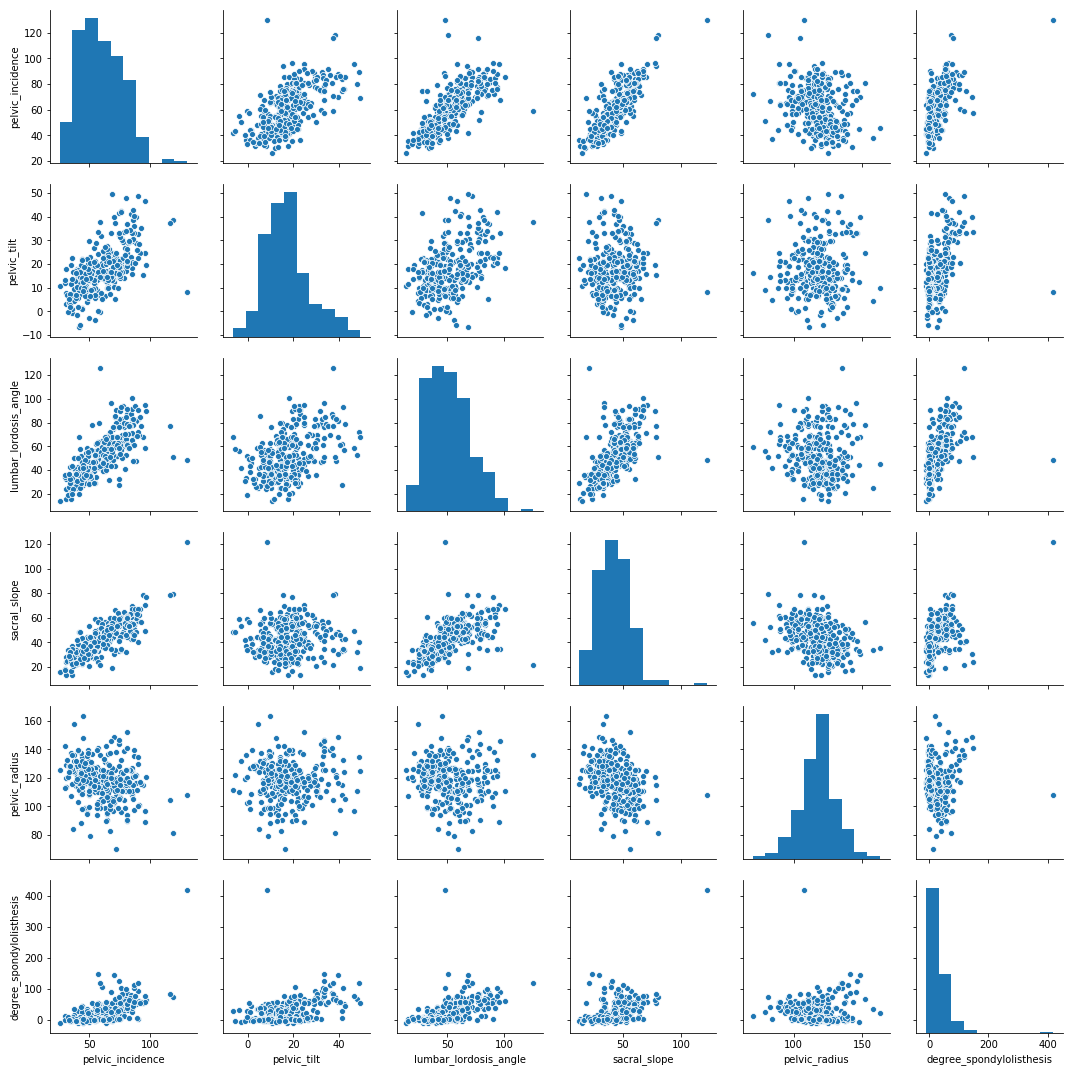

In [117]:
sns.pairplot(data_3C);

#### Insights from the pair plot about the attributes
- pelvic Incidence seems to be positively correlated with pelvic_tilt_numeric, lumbar_lordosis_angle and sacral slope
- No strong correlation is seen between pelvic_radius and pelivic incidence
- degree_spoldylolisthesis soent seem to correlate well with any of the ther features
- As a distribution degree_spoldylolisthesis is heavily positively skewed
- pelvic_tilt_numeric does not seem to have strong correlation with lumbar_lordosis_angle and sacral slope
- sacral_slope and lumbar_lordosis_angle seem to be positively correlated
- pelvic_radius seems to have no visible correlation with most of the other features
- pelvic radius has a very symmetric distribution 
- sacral slope has a some high outliers. If these outliers are removed then it is symmetric and near normal distribution. 
- lumbar_lordosis_angle has a some high outliers. If these outliers are removed then it is fairly symmetric.
- pelvic_tilt_numeric is slightly positively skewed with high outliers
- pelvic_incidence has a some high outliers.

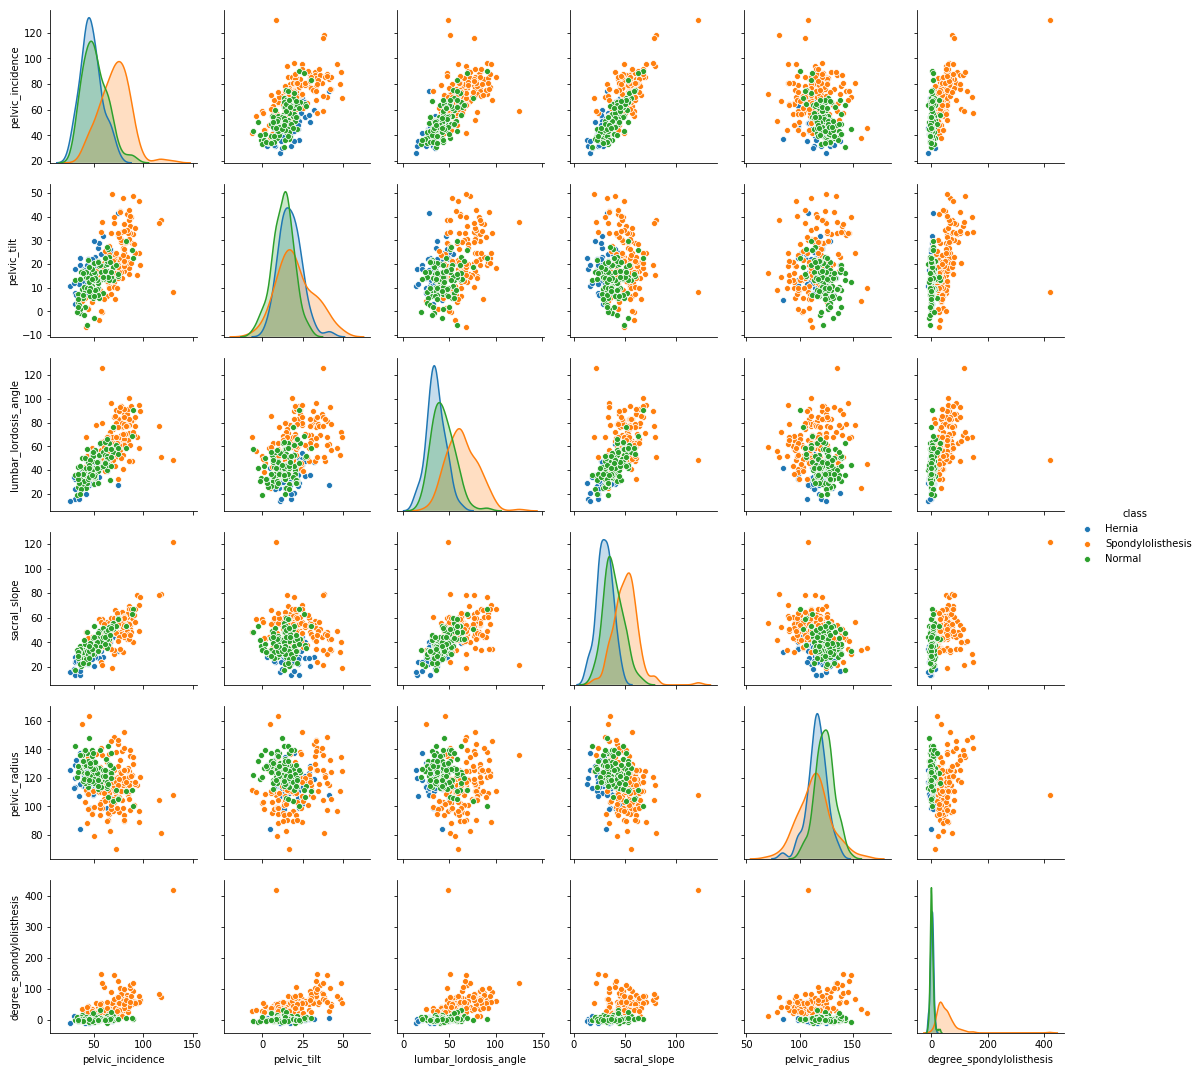

In [118]:
sns.pairplot(data_3C, hue = 'class');

#### Insights from the pair plot with hues
- The distributions do not separate out nicely when the hue based on class is applied
- This goes to show that without processing this data set may not give good KNN scores 
- This is also reflected in other scatter plots as well
- Frequency of the Spondylolisthesis is least among the three
- Degree spondylithesis values for spondylithesis patients are more than the other two
- Hernia and Normal patients have  similar values of Degree spondylithesis with very peaky and narrow distribution 

### Plotting the distribution of different classes for pelvic_radius and sacral_slope for visualization.

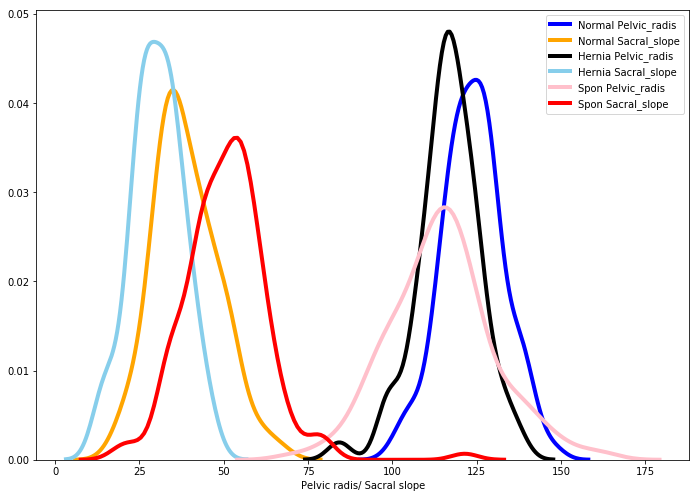

In [119]:
normal_data = data_3C.loc[data_3C['class'] == 'Normal']
hernia_data = data_3C.loc[data_3C['class']== 'Hernia']
spon_data = data_3C.loc[data_3C['class'] == 'Spondylolisthesis']
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set(xlabel = 'Pelvic radis/ Sacral slope')
sns.distplot(normal_data.pelvic_radius, hist = False,kde_kws={"color":"blue", "lw": 4, "label": "Normal Pelvic_radis"});
sns.distplot(normal_data.sacral_slope, hist = False, kde_kws={"color":"orange", "lw": 4, "label": "Normal Sacral_slope"});
sns.distplot(hernia_data.pelvic_radius, hist = False, kde_kws={"color":"k", "lw": 4, "label": "Hernia Pelvic_radis"});
sns.distplot(hernia_data.sacral_slope, hist = False, kde_kws={"color":"skyblue", "lw": 4, "label": "Hernia Sacral_slope"});
sns.distplot(spon_data.pelvic_radius, hist = False,kde_kws={"color":"pink", "lw": 4, "label": "Spon Pelvic_radis"});
sns.distplot(spon_data.sacral_slope, hist = False, kde_kws={"color":"red", "lw": 4, "label": "Spon Sacral_slope"});
ax.set(xlabel = 'Pelvic radis/ Sacral slope')
plt.show()

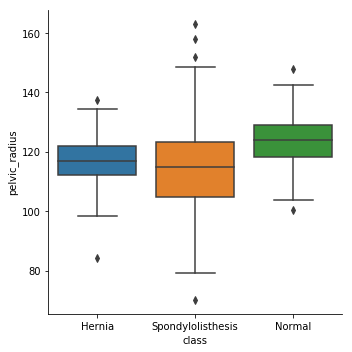

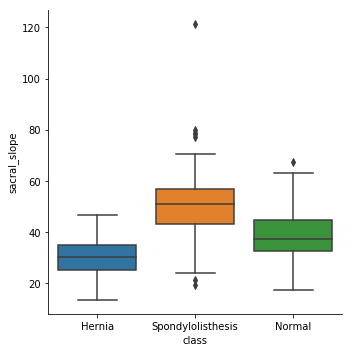

In [120]:
sns.catplot(x = 'class', y = 'pelvic_radius',  data=data_3C, kind = 'box');
sns.catplot(x = 'class', y = 'sacral_slope',  data=data_3C, kind = 'box');

#### Insights from the above distribution and box plots
- Pelvic radius and sacral slope them selves have different values and the distributions are separate
- Classes of Normal, Hernia and Spondylolisthesis visually do not seem to effect pelvic radius
- For sacral_slope Spondylolisthesis shows some separation from the other two classes (only slightly)
- From the box plot it is seen again that sacral slope for Spondylolisthesis is slightly higher than the other two classes (as mentioned also in the previous comment about the distribution plots)
- Hernia frequency is the highest follwed by normal and then Spondylolisthesis (lowest frequency)

# Encode the Class variable to integer.
- Also  verified that the encoding has taken place correctly

In [121]:
label_encoder = preprocessing.LabelEncoder() 
data_3C['class']= label_encoder.fit_transform(data_3C['class']) 
data_3C.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


#### Checking the codes that have been assigned to the categories

In [122]:
d = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print (d)

{'Hernia': 0, 'Normal': 1, 'Spondylolisthesis': 2}


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [123]:
X3C = data_3C.drop('class', axis = 1)

In [124]:
y3C = data_3C['class']

In [125]:
X3C.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [126]:
y3C.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Split the dat as train and test with a ratio of 70:30.

In [127]:
X_train3C, X_test3C, y_train3C, y_test3C = train_test_split(X3C, y3C, test_size=0.3, random_state=1)

#### Verifying that the split has taken place correctly

In [128]:
X_train3C.shape

(217, 6)

In [129]:
X_test3C.shape

(93, 6)

- This shows that the data set has been spilt into test and train data sets in the ratio of 70:30 

### NOTE: 
- It is to be noted that here only 1 random value is tested for developing the model. 
- Under these circumstances the model perfomance may change when the random state is changed
- Ideally once should run for several random states (as used in finding optimum K), and use the average value of testing and training accuracies to judge the model
- Here, as the question merely mentions to spilt and test the model withj K =3, only 1 random state value is used. 

# Normalize your Data (X) to get values between 0 to 1.

In [130]:
mm_scaler = preprocessing.MinMaxScaler()
X_scaled = mm_scaler.fit_transform(X_train3C)
X_test_scaled = mm_scaler.transform(X_test3C)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [131]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y_train3C)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [132]:
y_predict3C=knn.predict(X_test_scaled)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [133]:
knn.score(X_test_scaled,y_test3C)

0.6989247311827957

In [134]:
accuracy_score(y_predict3C,y_test3C)

0.6989247311827957

In [135]:
y_predict_train = knn.predict(X_scaled)
accuracy_score(y_predict_train,y_train3C)

0.8571428571428571

### Accuracies for K = 3 and random state = 0
- Training accuracy = 0.857
- Testing accuracy = 0.699

#### When averged over different random states, with k =3, the average testing and training accuracies are found below:

In [136]:
train = []
test = []
for j in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X3C, y3C, test_size=0.30,random_state=j)
    sc=preprocessing.MinMaxScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    
#Compute accuracy on the training set
train_accuracy_plot = np.mean(train)
#Compute accuracy on the testing set
test_accuracy_plot = np.mean(test)
#Compute differences between test and training set accuracies
difference_plot= train_accuracy_plot - test_accuracy_plot

print("Average Training Accuracy over 50 random states for K = 3: ", train_accuracy_plot)
print("Average Testing Accuracy over 50 random states for K = 3: ", test_accuracy_plot)



Average Training Accuracy over 50 random states for K = 3:  0.8829493087557604
Average Testing Accuracy over 50 random states for K = 3:  0.7550537634408602


### Accuracies for K = 3 and averaged over 50 random state values
- Training accuracy = 0.882
- Testing accuracy = 0.755

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

#### Algorithm used:
- A good model should not depend on the number of the random state selected for spliting the data
- Hence there are two parameters which have to be optimised - random state and k
- The value of K has to be chosen in such a way that over a variation of random states the training accuract and the difference between training and testing accuracies should be minimum
- It should not be that changing the data spliting radon state needs a change in the model 
- Hence, here, a nested loop is run over random state and K, so that we get the optimum value of K
- Criteria for choosing best K:
    - Lowest difference between training and testing accuracies 
    - Highest training accuracy

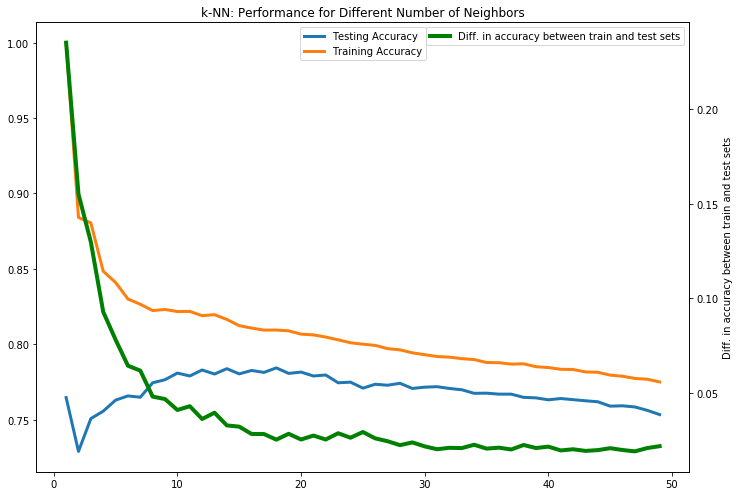

Optimum results with highest test accuracy and lowest diff between test and train accuracy 

Optimum K:  18
Training Accuracy for optimum K:  0.8094009216589865
Testing Accuracy for optimum K:  0.7843010752688173


In [137]:
neighbors = np.arange(1, 50)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
difference_plot = np.empty(len(neighbors))
diff_low = 100.0
test_high = 0.0
train_high = 0.0
nodes = 0
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X3C, y3C, test_size=0.30,random_state=j)
        sc=preprocessing.MinMaxScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    #Compute differences between test and training set accuracies
    difference_plot[i]= train_accuracy_plot[i] - test_accuracy_plot[i]
    if (diff_low > difference_plot[i]) & (test_high < test_accuracy_plot[i]):
        diff_low = difference_plot[i]
        test_high = test_accuracy_plot[i]
        train_high = train_accuracy_plot[i]
        nodes = i+1
        
# Generate plot
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax2 = ax.twinx()
plt.title('k-NN: Performance for Different Number of Neighbors')
ax.plot(neighbors, test_accuracy_plot, lw = 3, label = 'Testing Accuracy')
ax.plot(neighbors, train_accuracy_plot, lw = 3, label = 'Training Accuracy')
ax2.plot(neighbors, difference_plot, color = 'green', lw = 4, label = 'Diff. in accuracy between train and test sets')
ax.legend(loc = 'upper center')
ax2.legend(loc = 'upper right')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
ax2.set_ylabel('Diff. in accuracy between train and test sets')
plt.show()
print("Optimum results with highest test accuracy and lowest diff between test and train accuracy \n")
print("Optimum K: ", nodes)
print("Training Accuracy for optimum K: ", train_high)
print("Testing Accuracy for optimum K: ", test_high)



#### Manually verifying the results

In [138]:
d = {'Trainng':train_accuracy_plot, 'testing':test_accuracy_plot, 'Diff.': difference_plot}
accuracy_data = pd.DataFrame(d)
accuracy_data

,Trainng,testing,Diff.
0,1.000000,0.764624,0.235376
1,0.884055,0.728925,0.155131
2,0.880415,0.750645,0.129770
3,0.848387,0.755591,0.092796
4,0.840968,0.762903,0.078065
5,0.829954,0.765699,0.064255
6,0.826498,0.764839,0.061659
7,0.822304,0.774409,0.047896
8,0.823041,0.776452,0.046590
9,0.821659,0.780860,0.040799


#### Result Verified

## FINAL MODEL PERFORMANCE:
- Optimum results with highest test accuracy and lowest diff between test and train accuracy 

- Optimum K:  18
- Training Accuracy for optimum K:  0.809
- Testing Accuracy for optimum K:  0.784